In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D

2023-06-28 00:15:40.998895: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-28 00:15:44.246023: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-28 00:15:44.260353: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-28 00:15:52.866696: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array, load_img
from PIL import Image
import os.path

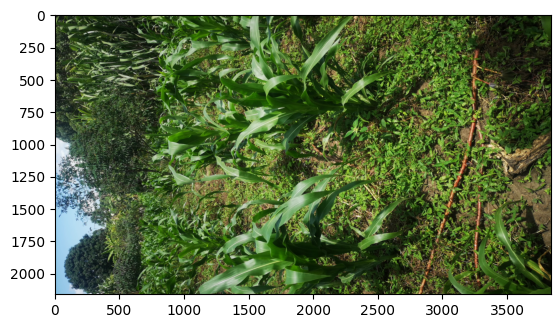

In [3]:
im = Image.open('/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/frame/frame00001.png') 
plt.imshow(im) 
plt.show() 

In [11]:
matooke = "/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/resized"
maize = "/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/resized/"

In [13]:
# from matplotlib.image import imread
# all_files=os.listdir("/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/resized/")
# data_path = [os.path.join(matooke + "/matooke/" + i) for i in all_files]
# k=0
# for i in data_path:
#     if k<4:
#       k=k+1
#       plt.subplot(2,2,k) 
#       img= Image.open(i)
#       plt.imshow(img)
# plt.show()

In [16]:
# from matplotlib.image import imread
# all_files=os.listdir("/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/resized/")
# data_path = [os.path.join(maize + "" + i) for i in all_files]
# k=0
# for i in data_path:
#     if k<4:
#       k=k+1
#       plt.subplot(2,2,k) 
#       img= Image.open(i)
#       plt.imshow(img)
# plt.show()

In [17]:
# split data into train and test set
# run this code once to split the data 

import splitfolders

image_directory= '/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/resized/'
splitfolders.ratio(image_directory, output="/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/split_data/",
        seed=42, ratio=(0.7, 0.15, 0.15), group_prefix=None, move=False) # default values

Copying files: 279 files [00:00, 746.47 files/s]


In [18]:

for dirname, _, filenames in os.walk("/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/split_data/train/cassava/"):
    for filename in filenames:
        img = Image.open(os.path.join(dirname, filename))
        x = img_to_array(img)
        print (x.shape)

(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)


In [19]:
train_data = "/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/split_data/train/"
test_data = "/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/split_data/test/"
val_data = "/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/split_data/val/"

In [20]:
import os
from pathlib import Path
lst = [train_data,test_data,val_data]
# rootdir = "/home/joshard/jupyter_env/files/deep_learn/dataset_potholes/split_data3/"
def count_files(rootdir):
    '''counts the number of files in each subfolder in a directory'''
    for directory in rootdir:
        for path in Path(directory).iterdir():
            if path.is_dir():
                print("There are " + str(len([name for name in os.listdir(path) \
                if os.path.isfile(os.path.join(path, name))])) + " files in " + \
                str(path.name))
            
 
count_files(lst) # data_dir is the directory you want files counted.

There are 48 files in cassava
There are 49 files in matooke
There are 49 files in grass
There are 49 files in maize
There are 11 files in cassava
There are 11 files in matooke
There are 11 files in grass
There are 11 files in maize
There are 10 files in cassava
There are 10 files in matooke
There are 10 files in grass
There are 10 files in maize


In [23]:

# def get_file_count(directory: str) -> int:
#     count = 0
#     for directory in lst:
#         for entry in os.scandir(directory):
#             if entry.is_file():
#                 count += 1

#             elif entry.is_dir():
#                 count += get_file_count(os.path.join(directory, entry.name))

#         return count
# get_file_count(rootdir)

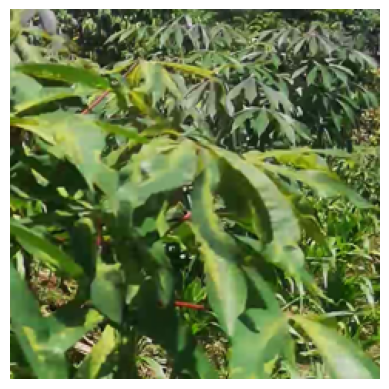

In [94]:
img = load_img(train_data + "cassava/6.png", target_size=(240,240))
# img = tf.image.rgb_to_grayscale(img)
plt.imshow(img)
plt.axis("off")
plt.show()

In [95]:
x = img_to_array(img)
print (x.shape)

(240, 240, 3)


In [96]:
from glob import glob
className = glob(train_data + '/*')
number_of_class = len(className)
print(number_of_class)

4


In [97]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
import matplotlib.pyplot as plt
from PIL import Image 
# dilation_rate=2

In [98]:
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape= x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32, (2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64, (2,2)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(100))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(4))#output
model.add(Activation("softmax"))


In [99]:
# optimizer = keras.optimizers.Adam(lr=0.01)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss = "categorical_crossentropy",
             optimizer = optimizer,
             metrics = ["accuracy"])

In [100]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 238, 238, 16)      448       
                                                                 
 activation_34 (Activation)  (None, 238, 238, 16)      0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 119, 119, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 118, 118, 32)      2080      
                                                                 
 activation_35 (Activation)  (None, 118, 118, 32)      0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 59, 59, 32)       0         
 g2D)                                                 

In [102]:
batch_size = 10

In [103]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True                                   
                                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_data,
                                                    target_size=(240,240),
                                                    batch_size = batch_size,
                                                    color_mode='rgb',
                                                    shuffle=True,
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_data,
                                                    target_size=(240,240),
                                                    batch_size = batch_size,
                                                    color_mode='rgb',
                                                    shuffle=False,  
                                                    class_mode = "categorical")
val_generator = test_datagen.flow_from_directory(val_data,
                                                    target_size=(240,240),
                                                    batch_size = batch_size,
                                                    color_mode='rgb',
                                                    shuffle=False,  
                                                    class_mode = "categorical")

Found 195 images belonging to 4 classes.
Found 44 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [104]:
# history = model.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=epochs
# )

In [105]:
hist = model.fit(train_generator, 
                   epochs = 10,
                   validation_data = val_generator,)

Epoch 1/10


2023-06-28 00:59:23.338197: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


20/20 [==============================] - ETA: 0s - loss: 1.4065 - accuracy: 0.2513

2023-06-28 00:59:29.881531: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


20/20 [==============================] - 7s 296ms/step - loss: 1.4065 - accuracy: 0.2513 - val_loss: 1.3326 - val_accuracy: 0.2750
Epoch 2/10
20/20 [==============================] - 6s 295ms/step - loss: 1.3072 - accuracy: 0.3231 - val_loss: 1.3331 - val_accuracy: 0.3000
Epoch 3/10
20/20 [==============================] - 6s 294ms/step - loss: 1.1044 - accuracy: 0.5077 - val_loss: 0.9836 - val_accuracy: 0.6250
Epoch 4/10
20/20 [==============================] - 6s 292ms/step - loss: 0.9210 - accuracy: 0.6205 - val_loss: 0.9864 - val_accuracy: 0.5500
Epoch 5/10
20/20 [==============================] - 6s 295ms/step - loss: 0.8966 - accuracy: 0.6410 - val_loss: 0.8691 - val_accuracy: 0.6750
Epoch 6/10
20/20 [==============================] - 6s 288ms/step - loss: 0.6430 - accuracy: 0.7590 - val_loss: 0.7716 - val_accuracy: 0.7000
Epoch 7/10
20/20 [==============================] - 6s 295ms/step - loss: 0.6189 - accuracy: 0.7590 - val_loss: 0.9503 - val_accuracy: 0.6250
Epoch 8/10
20/20 

In [106]:
import pickle

In [107]:

pickle.dump(model, open('/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/model.pkl', 'wb'))

In [108]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [109]:
tt_loss, tt_acc = model.evaluate(test_generator , steps=len(test_generator), verbose=1)
print('Test Loss: %.3f' % (tt_loss))
print('Test Accuracy: %.3f' % (tt_acc * 100.0)) 

1/5 [=====>........................] - ETA: 0s - loss: 0.7832 - accuracy: 0.7000

2023-06-28 01:01:27.567030: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - 0s 80ms/step - loss: 0.4020 - accuracy: 0.8182
Test Loss: 0.402
Test Accuracy: 81.818


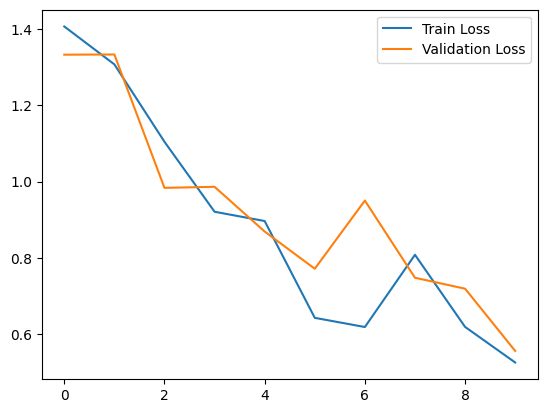

In [110]:
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

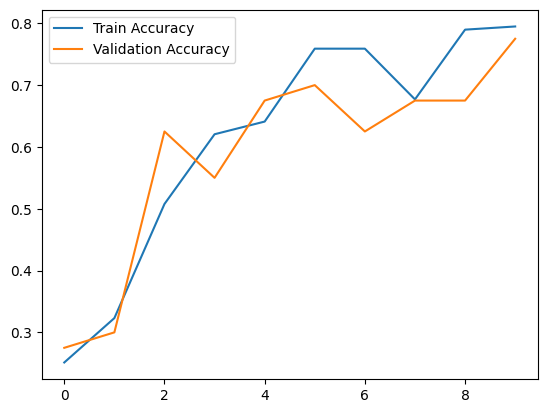

In [111]:
plt.plot(hist.history["accuracy"], label = "Train Accuracy")
plt.plot(hist.history["val_accuracy"], label = "Validation Accuracy")
plt.legend()
plt.show()

In [112]:

trained_model=pickle.load(open('/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/model.pkl','rb'))

In [115]:
rdImg = "/home/joshard/Documents/Masters Computer Science/Computer Vision/exam/cropped/grass/1.png"

In [117]:
# BaseImg = Image.open(img1);
rdImg = cv2.imread(rdImg)

In [118]:
# img = tf.image.rgb_to_grayscale(img)

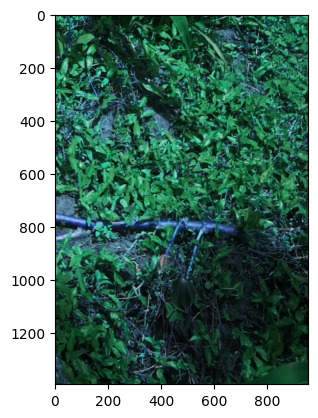

In [120]:
plt.imshow(rdImg)
plt.show()

In [122]:
newImg = cv2.resize(rdImg,(240,240)) 

In [124]:
newImg1 = newImg.reshape(1,240,240,3)

In [125]:
predictions = trained_model.predict(newImg1)

1/1 [==============================] - 0s 260ms/step


In [126]:
predictions

array([[0., 0., 1., 0.]], dtype=float32)

In [127]:
pred = np.argmax(predictions)

In [128]:
pred

2

In [129]:
preds = trained_model.predict(test_generator)
y_pred_1 = np.argmax(preds, axis=1)
print(y_pred_1)

2023-06-28 01:08:55.577934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


5/5 [==============================] - 1s 63ms/step
[0 3 0 0 0 1 0 0 0 3 3 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0
 3 3 3 3 3 3 3]


In [130]:
def plot_confusion_matrix(cm, classes, normalize= False, title= 'Confusion Matrix', cmap='summer'):
    '''
    This function plot confusion matrix method from sklearn package.
    '''

    plt.figure(figsize= (5, 5))
    plt.imshow(cm, interpolation= 'nearest', cmap= cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation= 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis= 1)[:, np.newaxis]
        print('Normalized Confusion Matrix')

    else:
        print('Confusion Matrix, Without Normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'black' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

Confusion Matrix, Without Normalization
[[ 7  1  0  3]
 [ 0 11  0  0]
 [ 0  0 11  0]
 [ 4  0  0  7]]


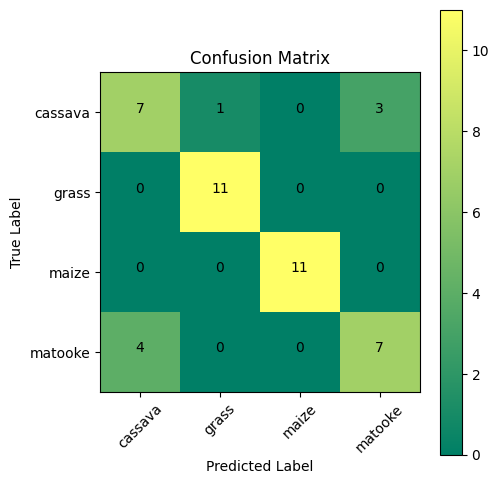

In [131]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report
g_dict = test_generator.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred_1)
plot_confusion_matrix(cm= cm, classes= classes, title = 'Confusion Matrix')


In [132]:
print(classification_report(test_generator.classes, y_pred_1, target_names= classes))

              precision    recall  f1-score   support

     cassava       0.64      0.64      0.64        11
       grass       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        11
     matooke       0.70      0.64      0.67        11

    accuracy                           0.82        44
   macro avg       0.81      0.82      0.81        44
weighted avg       0.81      0.82      0.81        44



In [133]:
from sklearn.metrics import confusion_matrix

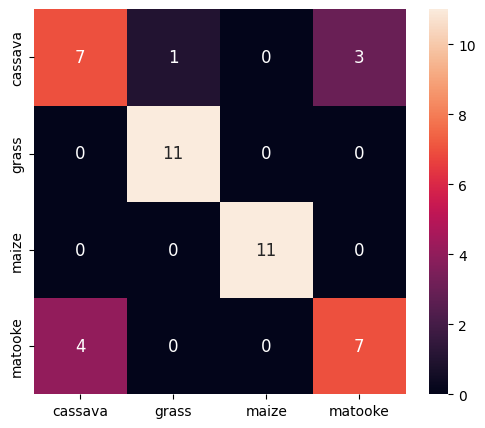

In [137]:
import seaborn as sns
cm = confusion_matrix(y_true=test_generator.classes, y_pred=y_pred_1)
cm = pd.DataFrame(cm, range(4),range(4))
plt.figure(figsize = (6,5))

classes = ['cassava','grass','maize','matooke']

sns.heatmap(cm, annot=True, annot_kws={"size": 12},xticklabels=classes, yticklabels=classes) # font size
plt.show()